**Importing Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\7.xor.csv",header=None)

In [4]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [6]:
df[2].value_counts(normalize = True)

-1.0    0.52
 1.0    0.48
Name: 2, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

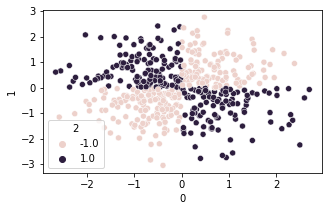

In [7]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.9)

In [9]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(450, 2) (450,)
(50, 2) (50,)


**Standardizing the train data**

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [12]:
std_train=std.fit_transform(x_train)

In [13]:
std_train

array([[ 1.37301839e+00,  2.36181906e-01],
       [ 5.27498780e-01,  2.77167194e+00],
       [ 8.61543769e-01,  9.08372905e-02],
       [-1.71906526e-01,  4.74500662e-01],
       [-7.44724179e-01,  1.11903473e+00],
       [ 1.69675981e+00,  1.95375362e-01],
       [-6.50442066e-01, -1.16209483e-01],
       [-1.32393763e-02, -2.82899657e-01],
       [-8.58460080e-02,  1.15719729e+00],
       [ 7.37214659e-01,  8.23230567e-01],
       [-8.51726587e-01,  4.16434330e-01],
       [ 2.06057892e+00, -1.19325551e-02],
       [-6.33868219e-01,  1.32076763e+00],
       [ 6.25092218e-01,  3.79456569e-01],
       [ 9.76749884e-01,  6.10339126e-01],
       [-1.50794720e+00,  4.46629946e-01],
       [ 1.14723114e+00,  6.82848278e-01],
       [ 1.45934186e+00,  8.12441148e-01],
       [ 7.13122537e-01, -4.25037431e-01],
       [-1.06104458e+00,  8.41258363e-02],
       [-1.77573499e-01, -8.74114447e-01],
       [-4.25475877e-01, -1.82819544e-01],
       [-1.10421264e+00, -4.02303854e-01],
       [ 5.

**Creating Dense layers**

In [14]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model=Sequential()
model.add(Dense(8, activation = 'relu', input_dim = 2,kernel_initializer='he_uniform'))
model.add(Dense(6, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(4, activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [21]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [37]:
save=model.fit(x_train,y_train,batch_size=10,epochs=800,verbose=1,validation_split=0.15)

Epoch 1/800
39/39 [==============================] - 1s 8ms/step - loss: -829109.1250 - accuracy: 0.1754 - val_loss: -897952.6875 - val_accuracy: 0.1912
Epoch 2/800
39/39 [==============================] - 0s 2ms/step - loss: -832909.3125 - accuracy: 0.1754 - val_loss: -901864.6250 - val_accuracy: 0.1912
Epoch 3/800
39/39 [==============================] - 0s 3ms/step - loss: -836653.8750 - accuracy: 0.1754 - val_loss: -905833.8125 - val_accuracy: 0.1912
Epoch 4/800
39/39 [==============================] - 0s 2ms/step - loss: -840158.3125 - accuracy: 0.1806 - val_loss: -909625.0000 - val_accuracy: 0.1912
Epoch 5/800
39/39 [==============================] - 0s 2ms/step - loss: -843981.5000 - accuracy: 0.1806 - val_loss: -913888.6250 - val_accuracy: 0.1912
Epoch 6/800
39/39 [==============================] - 0s 2ms/step - loss: -847695.8125 - accuracy: 0.1806 - val_loss: -917996.1875 - val_accuracy: 0.1912
Epoch 7/800
39/39 [==============================] - 0s 2ms/step - loss: -851323.3

In [38]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

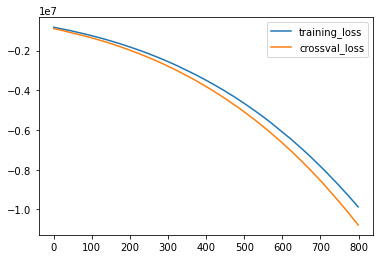

In [39]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [40]:
pred_train = model.predict(x_train)

15/15 [==============================] - 0s 1ms/step


In [41]:
pred_train

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [42]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [43]:
train_pred.shape

(450, 1)

In [44]:
y_pred = train_pred.flatten()

In [45]:
y_pred.shape

(450,)

<AxesSubplot:xlabel='0', ylabel='1'>

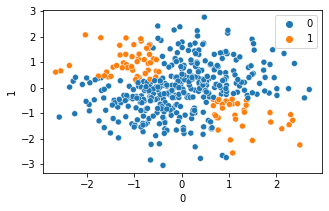

In [46]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_pred)

<AxesSubplot:xlabel='0', ylabel='1'>

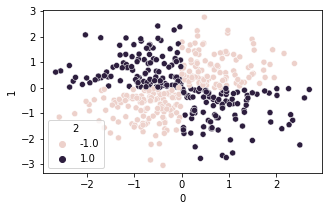

In [47]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [48]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

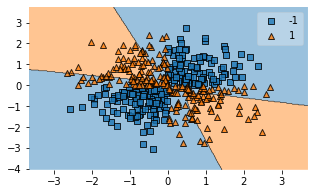

In [49]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

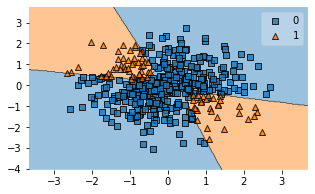

In [50]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_pred.astype(int),clf=model)

In [51]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

0.18666666666666668